In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ves

In [2]:
ab2 = np.logspace(0, 2.5, 21)
fopBlock = ves.VESModelling(ab2=ab2)
synth = [5, 10, 100, 300, 30]
data = fopBlock(synth)
thk = np.logspace(0, 1.5, 21)
fop = ves.VESRhoModelling(ab2=ab2, thk=thk)

08/09/24 - 10:11:34 - pyGIMLi - INFO - Found 1 regions.


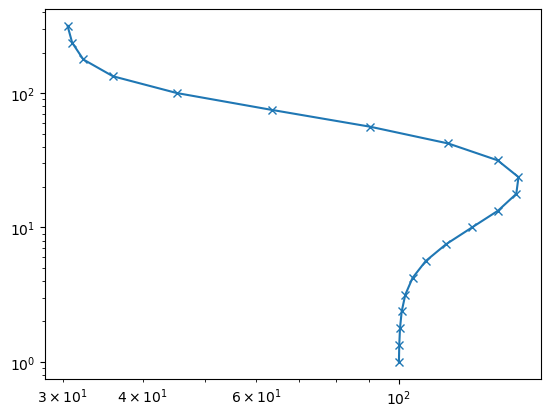

In [6]:
plt.loglog(data, ab2, "x-")

In [3]:
inv = pg.Inversion(fop=fop)
inv.dataVals = data
inv.dataTrans = 'log'
inv.modelTrans = 'log'
inv.run(data, 0.02, startModel=100, maxIter=0)

22 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

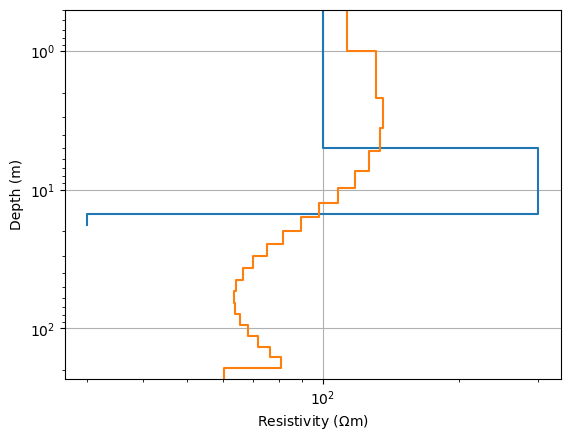

In [4]:
tD = inv.dataTrans
tM = inv.modelTrans
inv.inv.data()
dg = -inv.dataGradient()
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, model=synth)
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(dg*0.99)*inv.model, plot='loglog')

In [36]:
inv.model = np.exp(dg*0.99)*inv.model
inv.response = fop(inv.model)
fop.createJacobian(inv.model)
print(inv.chi2())

375.57977499839836


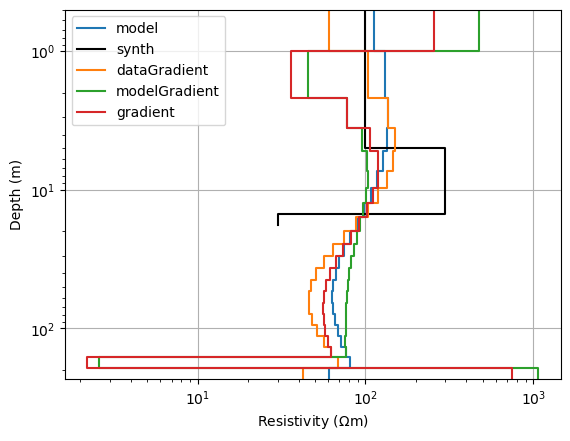

In [37]:
dg = -inv.dataGradient()
mg = -inv.modelGradient() * 10
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, thk, inv.model, label="model")
pg.viewer.mpl.drawModel1D(ax, model=synth, label="synth", color="black")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(dg*0.99)*inv.model, plot='loglog', label="dataGradient")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(mg*0.99)*inv.model, plot='loglog', label="modelGradient")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp((mg+dg)*0.99)*inv.model, plot='loglog', label="gradient")
ax.legend()

In [38]:
from pygimli.frameworks import lineSearch

In [39]:
# from pygimli.frameworks.inversion import DescentInversion
# sd = DescentInversion(fop=fop)
# sd.dataTrans = 'log'
# sd.modelTrans = 'log'
# sd.lambdaFactor = 0.8
# sd.run(data, startModel=100, verbose=True)

In [40]:
inv = pg.Inversion(fop=fop)
inv.dataTrans = 'log'
inv.modelTrans = 'log'
inv.run(data, 0.02, startModel=100, maxIter=0)
print(inv.chi2())
for iter in range(5):
    inv.lam = 10#*0.8**iter
    dm = -inv.gradient()
    tau, resp = lineSearch(inv, dm, method="exact", taumin=0.001, logScale=True)
    inv.model = np.exp(dm*tau)*inv.model
    inv.response = fop(inv.model)
    fop.createJacobian(inv.model)
    print(iter, tau, inv.chi2())

798.2147601805998
0 1.0 372.60127632698993
1 0.001 372.66322876870134
2 0.001 372.7208041692302
3 0.001 372.77408635869784
4 0.001 372.8231585717438


In [43]:
print(fop.constraints())

SparseMapMatrix: 21 x 22 (nnz=42 / 9.0%)


TypeError: float() argument must be a string or a number, not 'method'

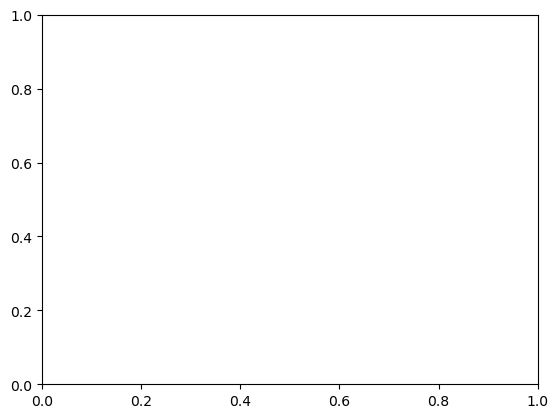

In [42]:
plt.plot(inv.chi2)

0.4006
0.4006


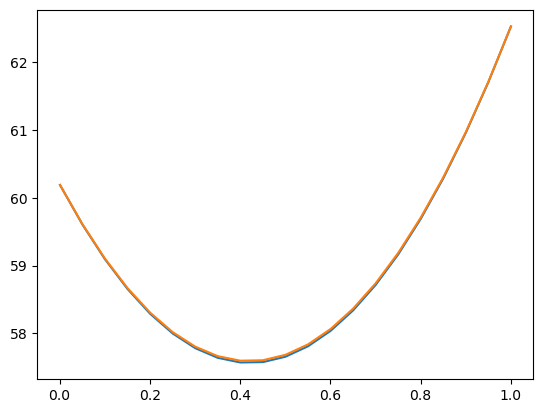

In [ ]:
dm = -inv.gradient()
# print(lineSearch(inv, dm, method="exact", taumin=0.001, logScale=True)[0])
print(lineSearch(inv, dm, method="exact", taumin=0.001, logScale=False, show=True)[0])
# print(lineSearch(inv, dm, method="inter", taumin=0.001, logScale=True)[0])
print(lineSearch(inv, dm, method="inter", taumin=0.001, logScale=False, show=True)[0])

(0.4215941896874483, None)

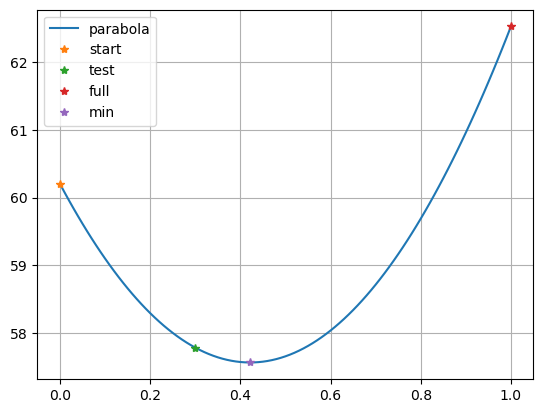

In [ ]:
lineSearch(inv, dm, method="quad", show=True)

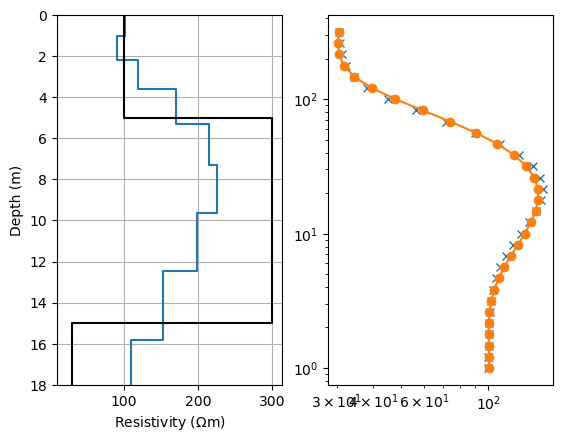

In [ ]:
fig, ax = plt.subplots(ncols=2)
pg.viewer.mpl.drawModel1D(ax[0], thk, inv.model, label="model")
pg.viewer.mpl.drawModel1D(ax[0], model=synth, label="synth", color="black")
ax[1].loglog(data, ab2, "x")
ax[1].loglog(inv.response, ab2, "o-", label="response")

In [ ]:
from pygimli.core.trans import str2Trans

In [ ]:
print(str2Trans('symlog0.01'))